<a href="https://colab.research.google.com/github/PrajwalPPatil/WQI_NSFWQI/blob/main/WQI_NSFWQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Explored Data Analysis**

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
# Load dataset
wqp=pd.read_csv(r"C:\Users\Laptop hub\Documents\wqp33project1.csv")
wqp.head()

,STATION CODE,LOCATIONS,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
0,30044,"RIVER TAPI AT PRAKASHA,(MAHARASHTRA)",NANDURBAR,21.0,5.8,8.20,472.0,4.4,3.190,8.0,120.0,NaN
1,30043,"RIVER TAPI AT AJNAD, (MAHARASHTRA)",JALGAON,23.0,5.6,8.40,479.0,5.2,3.020,6.0,110.0,NaN
2,1251,"RIVER TAPI AT BHUSAWAL U/S,BHUSAWAL RAILWAY COLONY,BHUSAWAL,JALGAON",JALGAON,23.0,6.4,7.40,654.5,3.2,1.770,6.5,60.0,2.0
3,1313,"RIVER TAPI AT AJAND VILLAGE, RAVER,JALGAON",JALGAON,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,68.5,2.0
4,1314,"RIVER TAPI AT UBAD VILLAGE,SHAHADA,NANDURBAR",NANDURBAR,29.0,5.9,7.65,636.5,3.0,1.530,6.5,58.0,2.0


In [ ]:
# To check data shape
wqp.shape

(124, 12)

In [ ]:
# To check no. of rows & columns
print(f'Number of rows: {wqp.shape[0]}')
print(f'Number of columns:{wqp.shape[1]}')

Number of rows: 124
Number of columns:12


In [ ]:
# To check muissing values
missing_values=wqp.isnull().sum()
print('missing values in each column:')
print(missing_values)

missing values in each column:
STATION CODE           0
LOCATIONS              0
DISTRICT               0
TEMP                   4
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE                0
FECAL_COLIFORM        11
TOTAL_COLIFORM        10
FECAL_STREPTOCOCCI    15
dtype: int64


In [ ]:
# Handle missing values
wqp.mean()
wqp.fillna(wqp.mean())   # Fill missing values with mean
wqp.fillna(wqp.mean(),inplace=True)

In [ ]:
#To show statistical analysis
wqp.describe()

,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,3478.096774,25.777083,6.037903,7.858871,965.887097,4.954839,3.244597,38.323009,377.254386,5.435780
std,6047.093334,3.638910,1.125795,0.340674,1295.026414,2.222670,2.545263,56.198469,367.765795,5.079891
min,11.000000,19.000000,4.550000,7.250000,165.500000,1.600000,0.300000,2.000000,2.000000,2.000000
25%,1908.750000,23.000000,5.500000,7.550000,498.125000,3.400000,1.655000,8.375000,83.500000,2.000000
50%,2190.500000,25.750000,5.975000,7.800000,653.500000,4.400000,2.590000,20.750000,230.000000,3.000000
75%,2681.250000,27.125000,6.500000,8.162500,797.250000,5.750000,4.150000,38.323009,624.375000,7.000000
max,30049.000000,34.000000,16.250000,8.500000,12057.000000,12.450000,17.500000,292.500000,1350.000000,22.000000


In [ ]:
# To check summary of dataset
wqp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATION CODE        124 non-null    int64  
 1   LOCATIONS           124 non-null    object 
 2   DISTRICT            124 non-null    object 
 3   TEMP                124 non-null    float64
 4   DO                  124 non-null    float64
 5   pH                  124 non-null    float64
 6   CONDUCTIVITY        124 non-null    float64
 7   BOD                 124 non-null    float64
 8   NITRATE             124 non-null    float64
 9   FECAL_COLIFORM      124 non-null    float64
 10  TOTAL_COLIFORM      124 non-null    float64
 11  FECAL_STREPTOCOCCI  124 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 11.8+ KB


In [ ]:
# Display first five rows
wqp.head()

,STATION CODE,LOCATIONS,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
0,30044,"RIVER TAPI AT PRAKASHA,(MAHARASHTRA)",NANDURBAR,21.0,5.8,8.20,472.0,4.4,3.190,8.0,120.0,5.43578
1,30043,"RIVER TAPI AT AJNAD, (MAHARASHTRA)",JALGAON,23.0,5.6,8.40,479.0,5.2,3.020,6.0,110.0,5.43578
2,1251,"RIVER TAPI AT BHUSAWAL U/S,BHUSAWAL RAILWAY COLONY,BHUSAWAL,JALGAON",JALGAON,23.0,6.4,7.40,654.5,3.2,1.770,6.5,60.0,2.00000
3,1313,"RIVER TAPI AT AJAND VILLAGE, RAVER,JALGAON",JALGAON,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,68.5,2.00000
4,1314,"RIVER TAPI AT UBAD VILLAGE,SHAHADA,NANDURBAR",NANDURBAR,29.0,5.9,7.65,636.5,3.0,1.530,6.5,58.0,2.00000


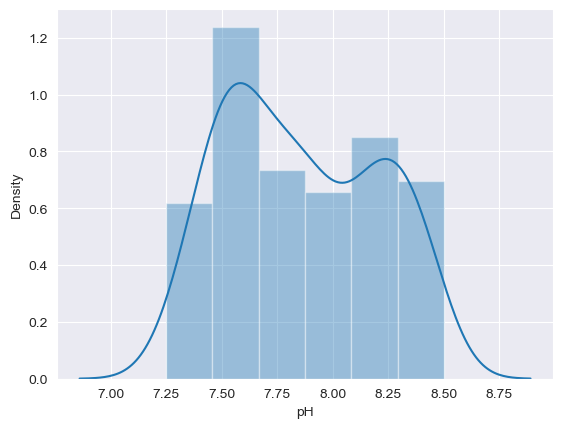

In [ ]:
#Distplot:
sns.distplot(wqp['pH'])
plt.show()

<Axes: >

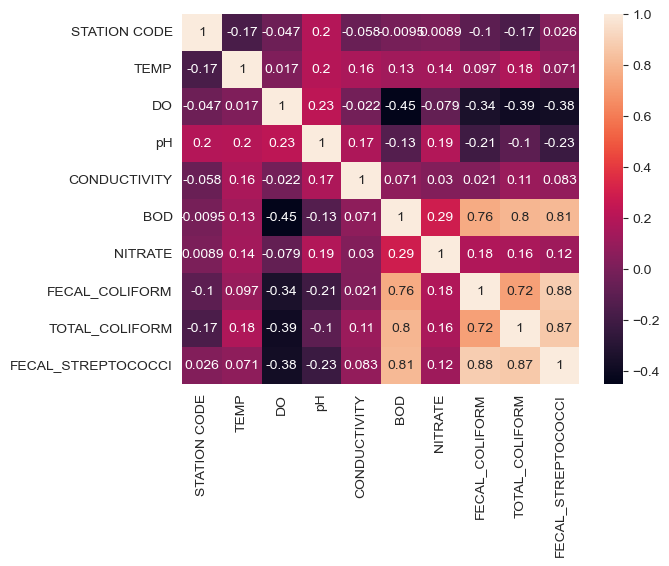

In [ ]:
#Correlation matrix:
sns.heatmap(wqp.corr(),annot=True)

[Text(0, 0, 'NANDURBAR'),
 Text(1, 0, 'JALGAON'),
 Text(2, 0, 'DHULE'),
 Text(3, 0, 'NASHIK'),
 Text(4, 0, 'AKOLA'),
 Text(5, 0, 'AMRAVATI'),
 Text(6, 0, 'PARBHANI'),
 Text(7, 0, 'NANDED'),
 Text(8, 0, 'LATUR'),
 Text(9, 0, 'AURANGABAD'),
 Text(10, 0, 'JALNA'),
 Text(11, 0, 'CHANDRAPUR'),
 Text(12, 0, 'YAVATMAL'),
 Text(13, 0, 'BHANDARA'),
 Text(14, 0, 'NAGPUR'),
 Text(15, 0, 'BULDANA'),
 Text(16, 0, 'WARDHA'),
 Text(17, 0, 'BEED'),
 Text(18, 0, 'KOLHAPUR'),
 Text(19, 0, 'SATARA'),
 Text(20, 0, 'SANGLI'),
 Text(21, 0, 'PUNE'),
 Text(22, 0, 'SOLAPUR')]

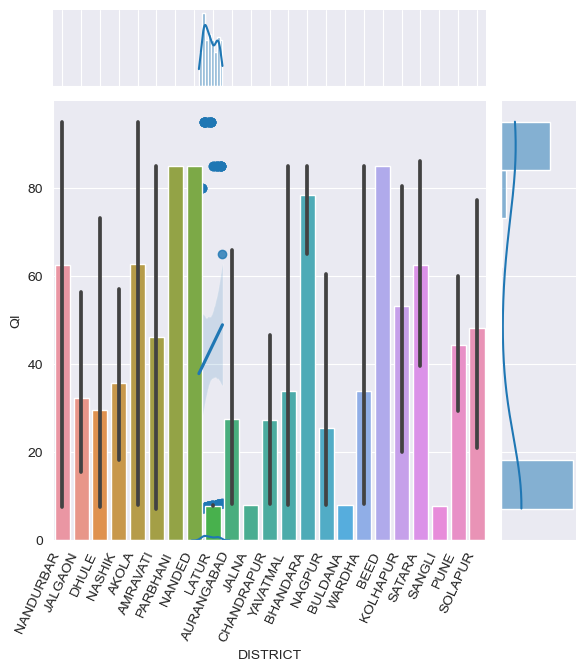

In [ ]:
#QI values:
pH=wqp["pH"]
pH.value_counts()
pH=pd.DataFrame(pH,index=None)
pH.head()
pH.pH.value_counts()
pH["QI"]=pH.replace(to_replace=6.4,value=54)
pH.head()
pH["QI"]=pH["QI"].replace(to_replace=[6.5,6.7,6.8,6.9],value =75)
pH["QI"]=pH["QI"].replace(to_replace=[7.0,7.1,7.2,7.3,7.4],value =80)
pH["QI"]=pH["QI"].replace(to_replace=[7.5,7.6,7.7,7.8,7.9],value =95)
pH["QI"]=pH["QI"].replace(to_replace=[8.0,8.1,8.2,8.3,8.4],value =85)
pH["QI"]=pH["QI"].replace(to_replace=[8.5,8.6,8.7,8.8,8.9],value =65)
pH["QI"]=pH["QI"].replace(to_replace=[9.0,9.1,9.2,9.3,9.4],value =48)
pH["QI"]=pH["QI"].replace(to_replace=[9.5,9.6,9.7,9.8,9.9],value =30)
pH["QI"]=pH["QI"].replace(to_replace=[10.0,10.1,10.2,10.3,10.4],value =20)
pH["QI"]=pH["QI"].replace(to_replace=[10.5,10.6,10.7,10.8,10.9],value =12)
pH["QI"]=pH["QI"].replace(to_replace=[11.0,11.1,11.2,11.3,11.4],value =8)
pH["QI"]=pH["QI"].replace(to_replace=[11.5,11.6,11.7,11.8,11.9],value =4)
pH["QI"]=pH["QI"].replace(to_replace=[12.0,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8],value =75)

pH["QI"].value_counts()
pH.head(), pH.tail()
sns.jointplot(x="pH", y="QI", data=pH, kind="reg")
sns.distplot(pH["pH"], kde=True, bins=10)
ls=wqp[["STATION CODE","DISTRICT"]]
ls.head()
df_col_merged = pd.concat([ls, pH], axis=1)
df_col_merged.head(124).to_csv('QI.csv')
ax=sns.barplot(x="DISTRICT", y= "QI",
data=df_col_merged)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65,
horizontalalignment='right')

In [ ]:
Result:
    In districts Parbhani ,Nanded & Beed has highest Qi(Quality rating of i th parameter) values whereas
Latur , Jalna , Buldana , Beed & sangali has lowest Qi values.

**Calculate WQI By NSFWQI **

In [ ]:
# Calculate wqi by NSFWQI
def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.TEMP,26)
wqp['sub_index_TEMP']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.DO,6)
wqp['sub_index_DO']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.pH,7.9)
wqp['sub_index_pH']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.CONDUCTIVITY,966)
wqp['sub_index_CONDUCTIVITY']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.BOD,5)
wqp['sub_index_BOD']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.NITRATE,50)
wqp['sub_index_NITRATE']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.FECAL_COLIFORM,38)
wqp['sub_index_FECAL_COLIFORM']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.TOTAL_COLIFORM,377)
wqp['sub_index_TOTAL_COLIFORM']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.FECAL_STREPTOCOCCI,5)
wqp['sub_index_FECAL_STREPTOCOCCI']=x

In [ ]:
wqp.drop(['STATION CODE','LOCATIONS','DISTRICT'],axis=1,inplace=True)

In [ ]:
wqp

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI,sub_index_TEMP,sub_index_DO,sub_index_pH,sub_index_CONDUCTIVITY,sub_index_BOD,sub_index_NITRATE,sub_index_FECAL_COLIFORM,sub_index_TOTAL_COLIFORM,sub_index_FECAL_STREPTOCOCCI
0,21.00,5.8,8.20,472.0,4.40,3.190,8.0,120.0,5.43578,3.106509,16.111111,13.138920,0.050581,17.6,0.1276,0.554017,0.084430,21.743119
1,23.00,5.6,8.40,479.0,5.20,3.020,6.0,110.0,5.43578,3.402367,15.555556,13.459382,0.051331,20.8,0.1208,0.415512,0.077394,21.743119
2,23.00,6.4,7.40,654.5,3.20,1.770,6.5,60.0,2.00000,3.402367,17.777778,11.857074,0.070138,12.8,0.0708,0.450139,0.042215,8.000000
3,25.00,6.4,7.40,3330.0,3.10,1.705,8.0,68.5,2.00000,3.698225,17.777778,11.857074,0.356854,12.4,0.0682,0.554017,0.048196,8.000000
4,29.00,5.9,7.65,636.5,3.00,1.530,6.5,58.0,2.00000,4.289941,16.388889,12.257651,0.068209,12.0,0.0612,0.450139,0.040808,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,25.50,5.9,7.70,535.0,4.95,2.500,5.0,37.0,2.00000,3.772189,16.388889,12.337766,0.057332,19.8,0.1000,0.346260,0.026033,8.000000
120,27.00,5.2,7.55,829.0,7.75,4.350,217.0,955.0,17.00000,3.994083,14.444444,12.097420,0.088838,31.0,0.1740,15.027701,0.671925,68.000000
121,27.00,4.9,7.55,636.5,10.25,3.700,147.5,1112.5,21.00000,3.994083,13.611111,12.097420,0.068209,41.0,0.1480,10.214681,0.782740,84.000000
122,25.75,5.2,7.50,3299.0,8.75,11.300,230.0,985.0,21.50000,3.809172,14.444444,12.017305,0.353531,35.0,0.4520,15.927978,0.693032,86.000000


In [ ]:
z=wqp.iloc[:,9:]
z
c=z.sum(axis=1)
c

0       72.516287
1       75.625461
2       54.470511
3       54.760343
4       53.556837
          ...    
119     60.828470
120    145.498412
121    165.916245
122    168.697463
123     99.901683
Length: 124, dtype: float64

In [ ]:
z['final index']=c
z.to_csv('NSFWQI.csv')

**Principle Component Analysis**

In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load dataset
wqp=pd.read_csv(r'C:\Users\Laptop hub\Documents\wqp33project1.csv')
wqp

,STATION CODE,LOCATIONS,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
0,30044,"RIVER TAPI AT PRAKASHA,(MAHARASHTRA)",NANDURBAR,21.00,5.8,8.20,472.0,4.40,3.190,8.0,120.0,NaN
1,30043,"RIVER TAPI AT AJNAD, (MAHARASHTRA)",JALGAON,23.00,5.6,8.40,479.0,5.20,3.020,6.0,110.0,NaN
2,1251,"RIVER TAPI AT BHUSAWAL U/S,BHUSAWAL RAILWAY COLONY,BHUSAWAL,JALGAON",JALGAON,23.00,6.4,7.40,654.5,3.20,1.770,6.5,60.0,2.0
3,1313,"RIVER TAPI AT AJAND VILLAGE, RAVER,JALGAON",JALGAON,25.00,6.4,7.40,3330.0,3.10,1.705,8.0,68.5,2.0
4,1314,"RIVER TAPI AT UBAD VILLAGE,SHAHADA,NANDURBAR",NANDURBAR,29.00,5.9,7.65,636.5,3.00,1.530,6.5,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,2680,"RIVER MUTHA AT\nKHADAKVASLA DAM,\nKHADAKVASLA, HAWELI, PUNE.",PUNE,25.50,5.9,7.70,535.0,4.95,2.500,5.0,37.0,2.0
120,2193,"RIVER MULA AT AUNDH\nBRIDGE, AUNDHGAON,\nHAWELI, PUNE",PUNE,27.00,5.2,7.55,829.0,7.75,4.350,217.0,955.0,17.0
121,2194,"RIVER MULA AT HARRISON\nBRIDGE NEAR MULA- PAWANA\nSANGAM, BOPODI, HAWELI,\nPUNE",PUNE,27.00,4.9,7.55,636.5,10.25,3.700,147.5,1112.5,21.0
122,2192,"RIVER MULA-MUTHA AT\nMUNDHAWA BRIDGE,\nMUNTHAWA,HAWELI, PUNE",PUNE,25.75,5.2,7.50,3299.0,8.75,11.300,230.0,985.0,21.5


In [ ]:
# Display summary of dataset
wqp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATION CODE        124 non-null    int64  
 1   LOCATIONS           124 non-null    object 
 2   DISTRICT            124 non-null    object 
 3   TEMP                120 non-null    float64
 4   DO                  124 non-null    float64
 5   pH                  124 non-null    float64
 6   CONDUCTIVITY        124 non-null    float64
 7   BOD                 124 non-null    float64
 8   NITRATE             124 non-null    float64
 9   FECAL_COLIFORM      113 non-null    float64
 10  TOTAL_COLIFORM      114 non-null    float64
 11  FECAL_STREPTOCOCCI  109 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 11.8+ KB


In [ ]:
# To show statistical analysis of dataset
wqp.describe()

,STATION CODE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
count,124.000000,120.000000,124.000000,124.000000,124.000000,124.000000,124.000000,113.000000,114.000000,109.000000
mean,3478.096774,25.777083,6.037903,7.858871,965.887097,4.954839,3.244597,38.323009,377.254386,5.435780
std,6047.093334,3.699562,1.125795,0.340674,1295.026414,2.222670,2.545263,58.893590,383.693700,5.421195
min,11.000000,19.000000,4.550000,7.250000,165.500000,1.600000,0.300000,2.000000,2.000000,2.000000
25%,1908.750000,23.000000,5.500000,7.550000,498.125000,3.400000,1.655000,8.000000,76.625000,2.000000
50%,2190.500000,25.500000,5.975000,7.800000,653.500000,4.400000,2.590000,17.000000,191.250000,2.000000
75%,2681.250000,27.500000,6.500000,8.162500,797.250000,5.750000,4.150000,26.500000,811.875000,7.500000
max,30049.000000,34.000000,16.250000,8.500000,12057.000000,12.450000,17.500000,292.500000,1350.000000,22.000000


In [ ]:
# To check missing values
missing_values=wqp.isnull().sum()
print('missing values in each column:')
print(missing_values)

missing values in each column:
STATION CODE           0
LOCATIONS              0
DISTRICT               0
TEMP                   4
DO                     0
pH                     0
CONDUCTIVITY           0
BOD                    0
NITRATE                0
FECAL_COLIFORM        11
TOTAL_COLIFORM        10
FECAL_STREPTOCOCCI    15
dtype: int64


In [ ]:
# Handle missing values
print(wqp.mean())
wqp= wqp.fillna(wqp.mean())  # Fill missing values with mean

STATION CODE          3478.096774
TEMP                    25.777083
DO                       6.037903
pH                       7.858871
CONDUCTIVITY           965.887097
BOD                      4.954839
NITRATE                  3.244597
FECAL_COLIFORM          38.323009
TOTAL_COLIFORM         377.254386
FECAL_STREPTOCOCCI       5.435780
dtype: float64


In [ ]:
wqp.isnull().sum()

STATION CODE          0
LOCATIONS             0
DISTRICT              0
TEMP                  0
DO                    0
pH                    0
CONDUCTIVITY          0
BOD                   0
NITRATE               0
FECAL_COLIFORM        0
TOTAL_COLIFORM        0
FECAL_STREPTOCOCCI    0
dtype: int64

In [ ]:
# To show first five rows
wqp.head()

,STATION CODE,LOCATIONS,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
0,30044,"RIVER TAPI AT PRAKASHA,(MAHARASHTRA)",NANDURBAR,21.0,5.8,8.20,472.0,4.4,3.190,8.0,120.0,5.43578
1,30043,"RIVER TAPI AT AJNAD, (MAHARASHTRA)",JALGAON,23.0,5.6,8.40,479.0,5.2,3.020,6.0,110.0,5.43578
2,1251,"RIVER TAPI AT BHUSAWAL U/S,BHUSAWAL RAILWAY COLONY,BHUSAWAL,JALGAON",JALGAON,23.0,6.4,7.40,654.5,3.2,1.770,6.5,60.0,2.00000
3,1313,"RIVER TAPI AT AJAND VILLAGE, RAVER,JALGAON",JALGAON,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,68.5,2.00000
4,1314,"RIVER TAPI AT UBAD VILLAGE,SHAHADA,NANDURBAR",NANDURBAR,29.0,5.9,7.65,636.5,3.0,1.530,6.5,58.0,2.00000


In [ ]:
# Separate features from the dataset
X = wqp.drop(columns=['STATION CODE','LOCATIONS','DISTRICT'])
X.head()

,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,TOTAL_COLIFORM,FECAL_STREPTOCOCCI
0,21.0,5.8,8.20,472.0,4.4,3.190,8.0,120.0,5.43578
1,23.0,5.6,8.40,479.0,5.2,3.020,6.0,110.0,5.43578
2,23.0,6.4,7.40,654.5,3.2,1.770,6.5,60.0,2.00000
3,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,68.5,2.00000
4,29.0,5.9,7.65,636.5,3.0,1.530,6.5,58.0,2.00000


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

In [ ]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

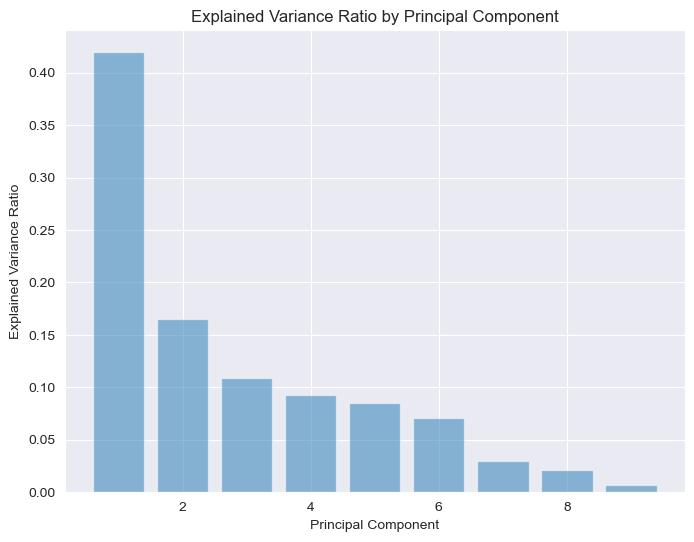

In [ ]:
# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [ ]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [ ]:
# Determine the number of components to retain
n_components = len(cumulative_explained_variance[cumulative_explained_variance <= 0.95]) + 1
print("Number of components to retain 95% of variance:", n_components)

Number of components to retain 95% of variance: 7


In [ ]:
# Re-apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

In [ ]:
# Creating a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

In [ ]:
# Output the principal components dataframe
print(principal_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -0.878972 -0.312647 -0.560377 -0.912967  0.632902  1.038151  0.172109
1 -0.723722  0.290311 -0.534265 -0.698296  0.372935  1.497842  0.199205
2 -1.442624 -1.521495  0.242366 -0.091547 -0.097661 -0.777672 -0.000196
3 -1.298795 -0.407035  1.784330 -0.758566 -0.218260 -1.479577  0.126321
4 -1.333832 -0.351686  0.449842  0.704646 -1.134294 -0.252601  0.263821


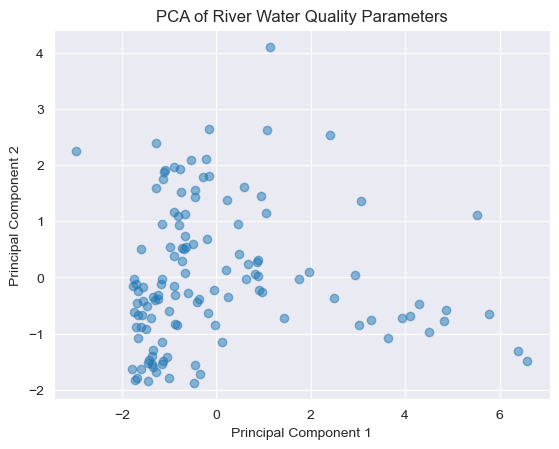

In [ ]:
# Visualize the data in the reduced dimensional space
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of River Water Quality Parameters')
plt.show()

In [ ]:
X=wqp.drop(columns=['LOCATIONS','TOTAL_COLIFORM','FECAL_STREPTOCOCCI'])
X.head()

,STATION CODE,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,sub_index_TEMP,sub_index_DO,sub_index_pH,sub_index_CONDUCTIVITY,sub_index_BOD,sub_index_NITRATE,sub_index_FECAL_COLIFORM
0,30044,NANDURBAR,21.0,5.8,8.20,472.0,4.4,3.190,8.0,3.106509,16.111111,13.138920,0.050581,17.6,0.1276,0.554017
1,30043,JALGAON,23.0,5.6,8.40,479.0,5.2,3.020,6.0,3.402367,15.555556,13.459382,0.051331,20.8,0.1208,0.415512
2,1251,JALGAON,23.0,6.4,7.40,654.5,3.2,1.770,6.5,3.402367,17.777778,11.857074,0.070138,12.8,0.0708,0.450139
3,1313,JALGAON,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,3.698225,17.777778,11.857074,0.356854,12.4,0.0682,0.554017
4,1314,NANDURBAR,29.0,5.9,7.65,636.5,3.0,1.530,6.5,4.289941,16.388889,12.257651,0.068209,12.0,0.0612,0.450139


In [ ]:
# Calculate wqi by NSFWQI using PCA
def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.TEMP,26)
wqp['sub_index_TEMP']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.DO,6)
wqp['sub_index_DO']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.pH,7.9)
wqp['sub_index_pH']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.CONDUCTIVITY,966)
wqp['sub_index_CONDUCTIVITY']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.BOD,5)
wqp['sub_index_BOD']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.NITRATE,50)
wqp['sub_index_NITRATE']=x

def exmp (c,s):
    w=1/s
    wqi=w*(c/s)*100
    return wqi

x=exmp (wqp.FECAL_COLIFORM,38)
wqp['sub_index_FECAL_COLIFORM']=x

In [ ]:
X.drop('STATION CODE',axis=1,inplace=True)
X.head()

,DISTRICT,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE,FECAL_COLIFORM,sub_index_TEMP,sub_index_DO,sub_index_pH,sub_index_CONDUCTIVITY,sub_index_BOD,sub_index_NITRATE,sub_index_FECAL_COLIFORM
0,NANDURBAR,21.0,5.8,8.20,472.0,4.4,3.190,8.0,3.106509,16.111111,13.138920,0.050581,17.6,0.1276,0.554017
1,JALGAON,23.0,5.6,8.40,479.0,5.2,3.020,6.0,3.402367,15.555556,13.459382,0.051331,20.8,0.1208,0.415512
2,JALGAON,23.0,6.4,7.40,654.5,3.2,1.770,6.5,3.402367,17.777778,11.857074,0.070138,12.8,0.0708,0.450139
3,JALGAON,25.0,6.4,7.40,3330.0,3.1,1.705,8.0,3.698225,17.777778,11.857074,0.356854,12.4,0.0682,0.554017
4,NANDURBAR,29.0,5.9,7.65,636.5,3.0,1.530,6.5,4.289941,16.388889,12.257651,0.068209,12.0,0.0612,0.450139


In [ ]:
z=X.iloc[:,8:]
z
c=z.sum(axis=1)
c

0      50.688738
1      53.804948
2      46.428296
3      46.712147
4      45.516029
         ...    
119    52.802437
120    76.826487
121    81.133505
122    82.004430
123    63.198097
Length: 124, dtype: float64

In [ ]:
z['final index']=c
z.to_csv('NSFWQI1.csv')

In [ ]:
wqi=pd.read_csv(r'C:\Users\Laptop hub\wqi(NSFWQI).csv')
wqi

,STATION CODE,final index
0,30044,87.480473
1,30043,96.165529
2,1251,75.892504
3,1313,78.070985
4,1314,72.944450
...,...,...
119,2680,94.055421
120,2193,78.375892
121,2194,71.373236
122,2192,77.305661


In [ ]:
wqi['WQI Rank'] = wqi['final index'].rank(ascending=False)
wqi

,STATION CODE,final index,WQI Rank
0,30044,87.480473,57.0
1,30043,96.165529,18.0
2,1251,75.892504,99.0
3,1313,78.070985,91.0
4,1314,72.944450,111.0
...,...,...,...
119,2680,94.055421,34.0
120,2193,78.375892,89.0
121,2194,71.373236,115.0
122,2192,77.305661,94.0


In [ ]:
wqi.to_csv('data.csv')

# Cluster Analysis(KMeans)

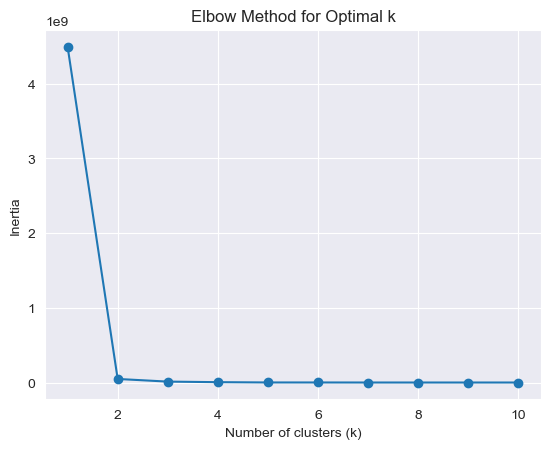

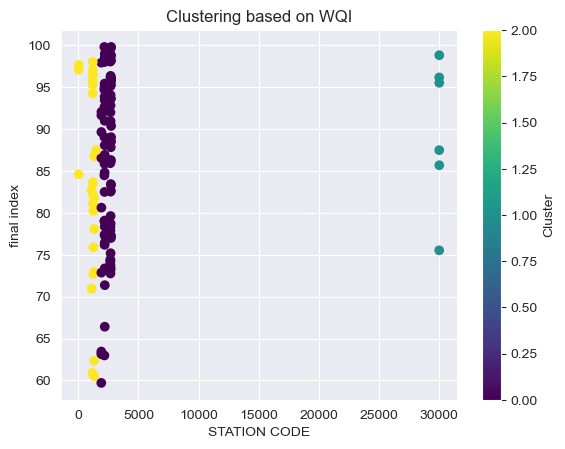

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your water quality data with WQI and other relevant attributes into a DataFrame
data = wqi
# Select the features (columns) for clustering
X = data[['final index', 'STATION CODE']]

# Perform data normalization if necessary
# You can use methods like MinMaxScaler or StandardScaler from scikit-learn

# Determine the optimal number of clusters using the elbow method
# Here, you can plot the inertia (within-cluster sum of squares) for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow method, choose the optimal number of clusters

# Apply K-means clustering with the chosen number of clusters
k = 3  # chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualize the clusters
# You can create scatter plots or other visualizations based on your specific requirements
# For example, visualize clusters using a scatter plot of WQI vs. other_attribute1
plt.scatter(data['STATION CODE'], data['final index'], c=data['Cluster'], cmap='viridis')
plt.xlabel('STATION CODE')
plt.ylabel('final index')
plt.title('Clustering based on WQI')
plt.colorbar(label='Cluster')
plt.show()


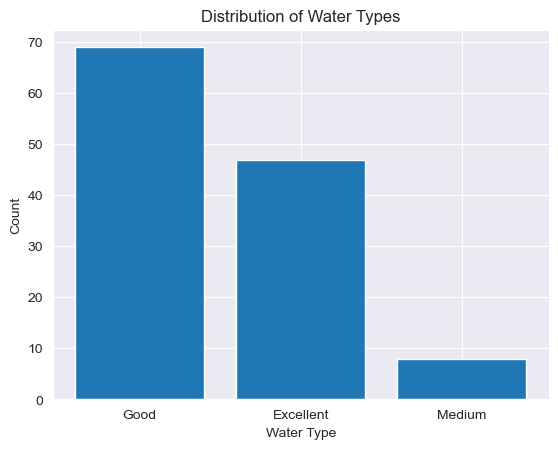

In [ ]:
import pandas as pd

# Step 2: Load data
# Assume 'water_quality_data.csv' contains your water quality data
water_quality_df = pd.read_csv(r'C:\Users\Laptop hub\wqi(NSFWQI).csv')

# Step 3: Calculate WQI
# Implement NSFWQI or any other WQI calculation method

# Step 4: Define Water Types
# Define WQI ranges and corresponding water types
wqi_ranges = {
    (0, 25):  'Poor',
    (25, 50): 'Fair',
    (50, 70): 'Medium',
    (70, 90): 'Good',
    (90, 100): 'Excellent'
}

# Step 5: Assign Water Types
def assign_water_type(wqi_value):
    for range_, water_type in wqi_ranges.items():
        if range_[0] <= wqi_value <= range_[1]:
            return water_type
    return 'Unknown'

water_quality_df['Water Type'] = water_quality_df['final index'].apply(assign_water_type)

# Step 6: Visualize Results
# Create visualizations to show the distribution of water types

# For example:
import matplotlib.pyplot as plt

water_type_counts = water_quality_df['Water Type'].value_counts()
plt.bar(water_type_counts.index, water_type_counts.values)
plt.xlabel('Water Type')
plt.ylabel('Count')
plt.title('Distribution of Water Types')
plt.show()


# Potability

In [ ]:
# Load the new dataset
new_file_path = r"C:\Users\Laptop hub\Documents\Project\prowqp - Copy(potability).csv"
df_new = pd.read_csv(new_file_path)

# Display basic information and the first few rows
df_new.info(), df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION CODE    124 non-null    int64  
 1   TEMP            120 non-null    float64
 2   DO              124 non-null    float64
 3   pH              124 non-null    float64
 4   CONDUCTIVITY    124 non-null    float64
 5   BOD             124 non-null    float64
 6   NITRATE         124 non-null    float64
 7   FECAL_COLIFORM  113 non-null    float64
 8   Potability      124 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 8.8 KB


(None,
    STATION CODE  TEMP   DO    pH  CONDUCTIVITY  BOD  NITRATE  FECAL_COLIFORM  \
 0         30044  21.0  5.8  8.20         472.0  4.4    3.190             8.0   
 1         30043  23.0  5.6  8.40         479.0  5.2    3.020             6.0   
 2          1251  23.0  6.4  7.40         654.5  3.2    1.770             6.5   
 3          1313  25.0  6.4  7.40        3330.0  3.1    1.705             8.0   
 4          1314  29.0  5.9  7.65         636.5  3.0    1.530             6.5   
 
    Potability  
 0           1  
 1           1  
 2           1  
 3           1  
 4           1  )

In [ ]:
# Handle missing values
df_new.isnull().sum()
df_new.mean()
df_new.fillna(df_new.mean())
df_new.fillna(df_new.mean(),inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATION CODE    124 non-null    int64  
 1   TEMP            124 non-null    float64
 2   DO              124 non-null    float64
 3   pH              124 non-null    float64
 4   CONDUCTIVITY    124 non-null    float64
 5   BOD             124 non-null    float64
 6   NITRATE         124 non-null    float64
 7   FECAL_COLIFORM  124 non-null    float64
 8   Potability      124 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 8.8 KB


1    116
0      8
Name: Potability, dtype: int64


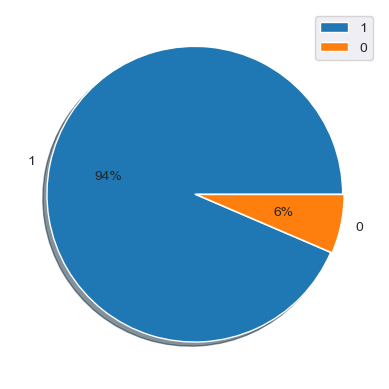

In [ ]:
tar = df_new['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[1,0], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop rows with missing values
df_cleaned = df_new.dropna()

# Split features and target
X = df_cleaned.drop(columns=["STATION CODE", "Potability"])
y = df_cleaned["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(1.0,
 '              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        25\n\n    accuracy                           1.00        25\n   macro avg       1.00      1.00      1.00        25\nweighted avg       1.00      1.00      1.00        25\n',
 array([[25]], dtype=int64))

# Logistic Regression & SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Logistic Regression Model
log_model = LogisticRegression()
log_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring="accuracy")

# Support Vector Machine (SVM) Model
svm_model = SVC(kernel="linear")
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring="accuracy")

# Average accuracy from cross-validation
log_accuracy = log_scores.mean()
svm_accuracy = svm_scores.mean()

log_accuracy, svm_accuracy


(0.9800000000000001, 0.99)